# Project Description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.
Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [40]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [41]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


There are 6 int(64) and 9 objects datatype available in this dataset

In [43]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There is no any null valu present in this dataset.

In [44]:
df.shape

(32560, 15)

There are 32560 rows and 15 columns present in this dataset

In [7]:
for i in df.columns:
    print(df[i].value_counts(), ('\n'))

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64 

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64 

164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64 

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype

In Workclass column there are 1836 ? object.
In Occupation column there are 1843 ? object.
In Capital_gain column there are 29849 data is 0 values
In calital_loss column there are 31041 data is 0 vaues
In Native_country column also has 583 ? object.
So, Need to convert ? into null values


In [45]:
df=df.drop_duplicates()

In [46]:
df.shape

(32536, 15)

I have removed duplicate rows

In [79]:
#There are two columns which has maximum 0 values so, need to zero.
df=df.drop(['Capital_gain','Capital_loss'], axis=1)

In [80]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K


In [81]:
df.describe()

,Age,Fnlwgt,Education_num,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,40.440343
std,13.638193,1.055563e+05,2.571622,12.347079
min,17.000000,1.228500e+04,1.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99.000000


All data available in dataset. 
50% and mean values are almost same.
Mean and stadard division values are proper.
I am checking the if there are any outliers present in this dataset.

In [85]:
con=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        con.append(i)

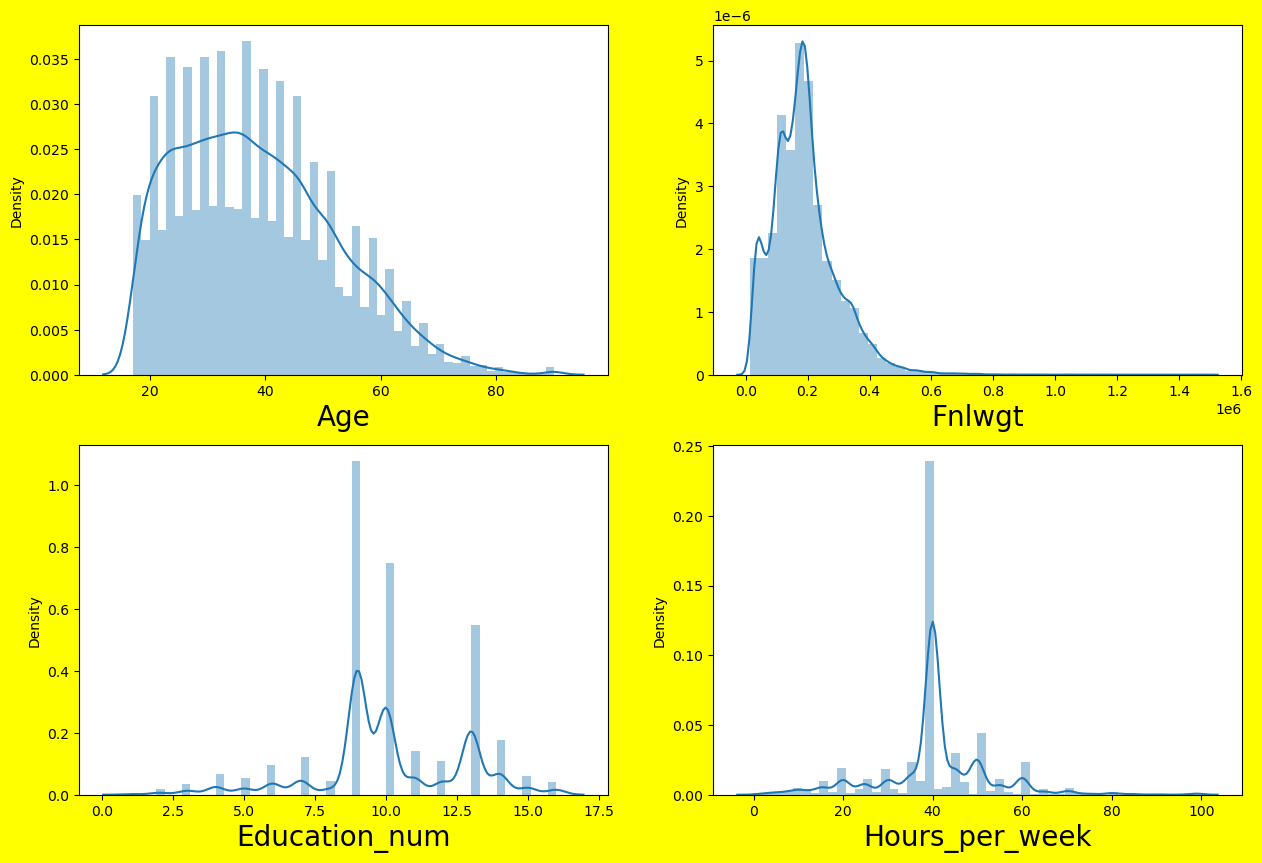

In [89]:
#Checking Outlier in the dataset
plt.figure(figsize=(15,10), facecolor='yellow')
plotnumber=1

for column in df[con]:
    if plotnumber<=4:
        ax=plt.subplot(2,2, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.show()

There are outliers in 'Fnlwgt', 'Education_num'& ' Hours_per_week' columns. So, I will again check the outliers in box plot

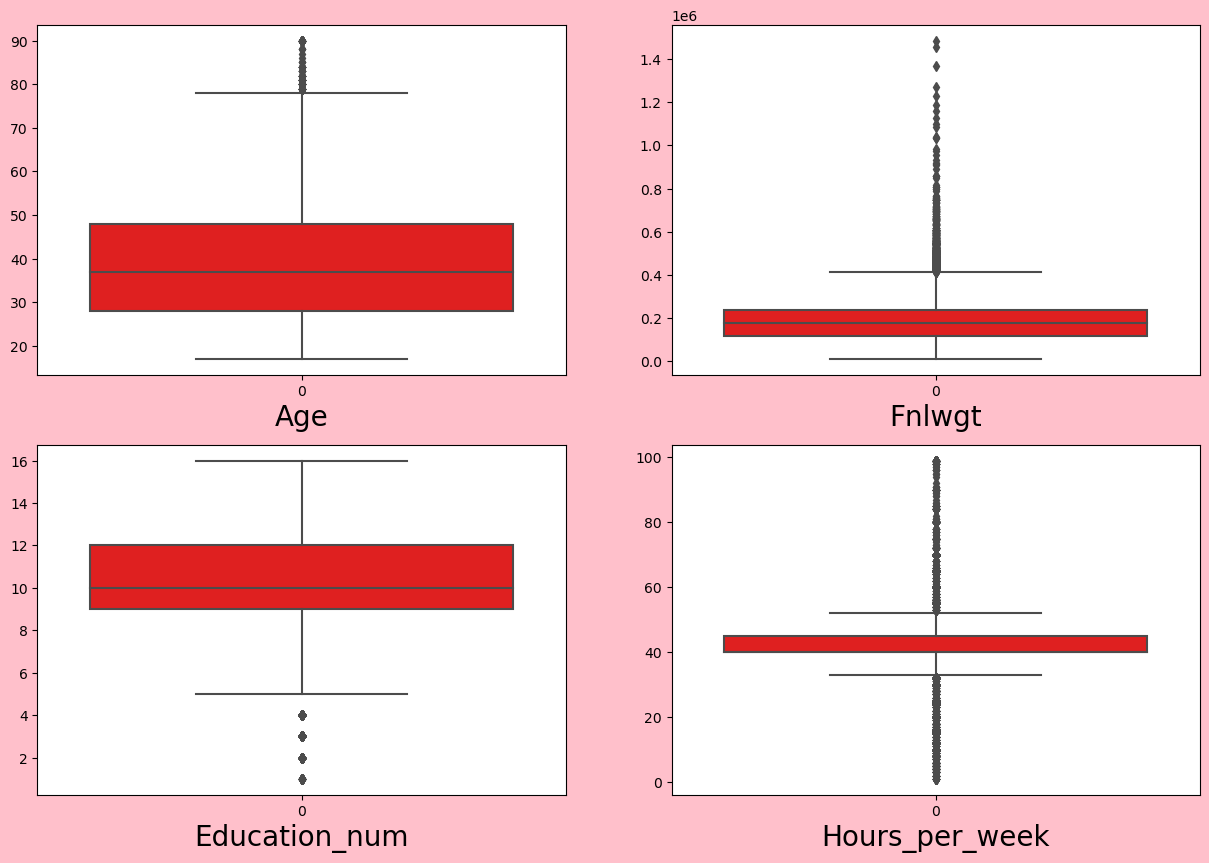

In [92]:
#Checking Outlier in the dataset
plt.figure(figsize=(15,10), facecolor='pink')
plotnumber=1

for column in df[con]:
    if plotnumber<=4:
        ax=plt.subplot(2,2, plotnumber)
        sns.boxplot(df[column], color='r')
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.show()

I can see there are outliers present in thid dataset. So, I will remove these outliers by using zscore

In [93]:
from scipy.stats import zscore

In [94]:
z_score=zscore(df[con])

In [95]:
abs_z_score=np.abs(z_score)

In [96]:
filter_entry=(abs_z_score<3).all(axis=1)

In [97]:
df=df[filter_entry]

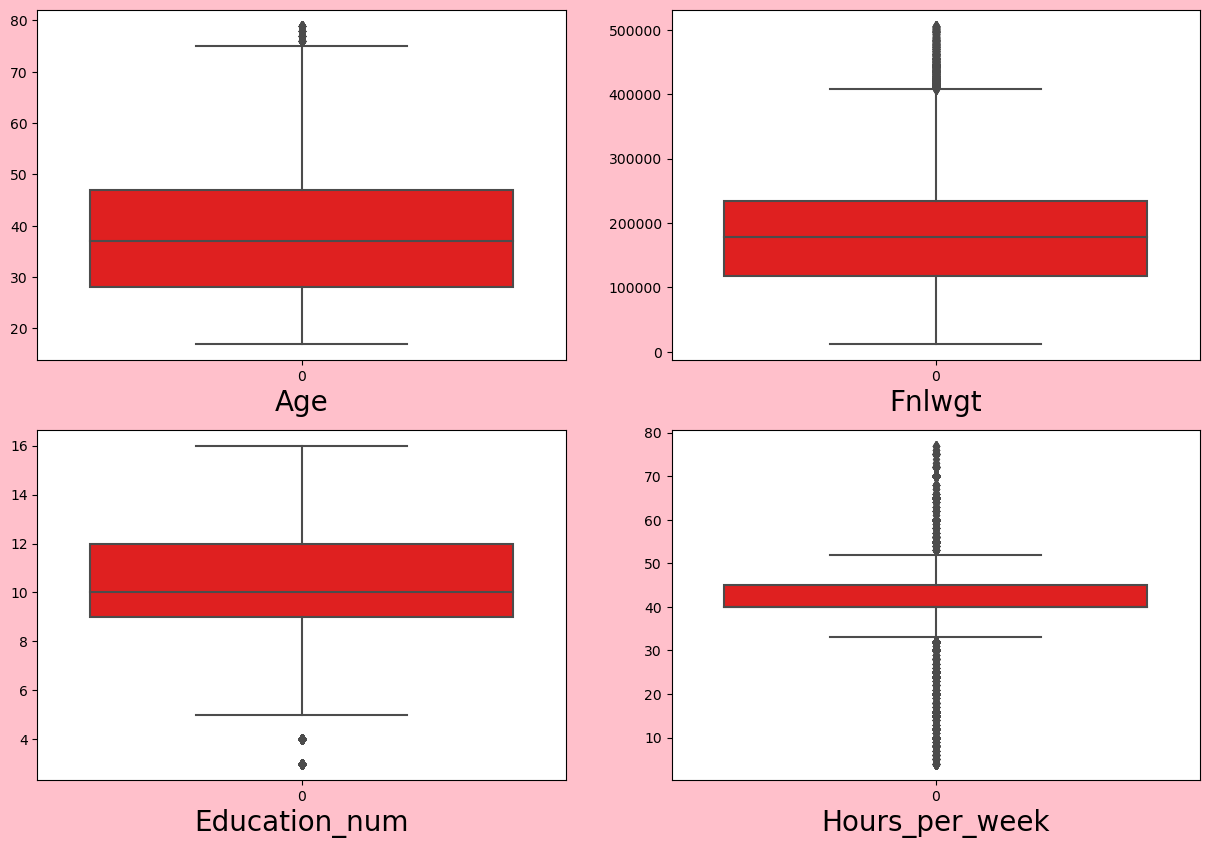

In [98]:
#Checking again Outliers in the dataset
plt.figure(figsize=(15,10), facecolor='pink')
plotnumber=1

for column in df[con]:
    if plotnumber<=4:
        ax=plt.subplot(2,2, plotnumber)
        sns.boxplot(df[column], color='r')
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.show()

I have manage to remove outliers from the dataset. Now, I am going to change the categorical data to continues data

In [99]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [101]:
cat=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat.append(i)

In [118]:
for i in cat:
    df1=le.fit_transform(df[i])
    df[i]=df1

In [119]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,6,83311,8,13,2,4,0,4,1,13,39,0
1,38,4,215646,10,9,0,6,1,4,1,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,40,39,0
3,28,4,338409,8,13,2,10,5,2,0,40,5,0
4,37,4,284582,11,14,2,4,5,4,0,40,39,0


Now I have converted categorical data to continues data. Now I will check the Multicollinearity issue in independend variables

In [121]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df.drop('Income',axis=1)
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor (x, i) for i in range(x.shape[1])]
vif['feature']=x.columns
vif

,vif,feature
0,8.985141,Age
1,8.532714,Workclass
2,4.602118,Fnlwgt
3,9.589661,Education
4,19.589114,Education_num
5,4.005050,Marital_status
6,3.700941,Occupation
7,2.624053,Relationship
8,17.891962,Race
9,4.442769,Sex


<Axes: >

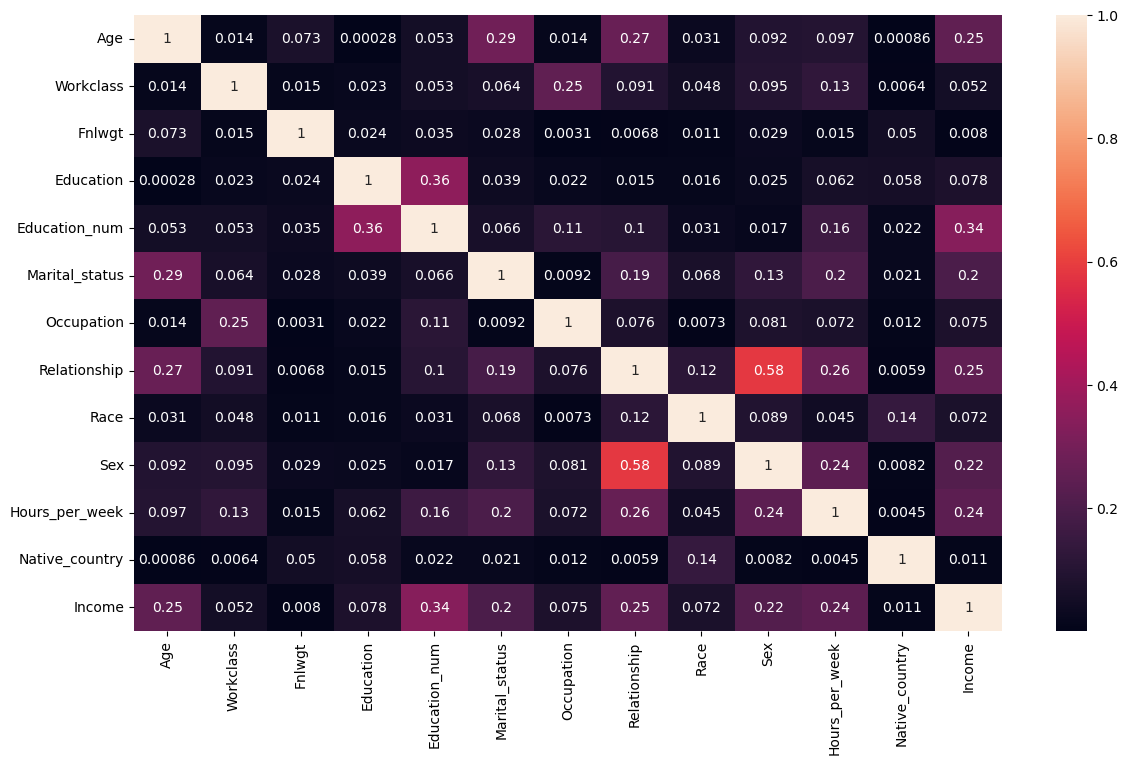

In [123]:
df_corr=df.corr().abs()
plt.figure(figsize=(14,8))
sns.heatmap(df_corr, annot=True, annot_kws={'size':10})

In vif I can see the Multicollinearity issue but in Heatmap I can't see any Multicollinearity issue.But, I will remove those columns which has highest VIF values

In [124]:
df=df.drop(['Native_country','Education_num'],axis=1)

In [125]:
df.head()

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Income
0,50,6,83311,8,2,4,0,4,1,13,0
1,38,4,215646,10,0,6,1,4,1,40,0
2,53,4,234721,1,2,6,0,2,1,40,0
3,28,4,338409,8,2,10,5,2,0,40,0
4,37,4,284582,11,2,4,5,4,0,40,0


0    23836
1     7606
Name: Income, dtype: int64


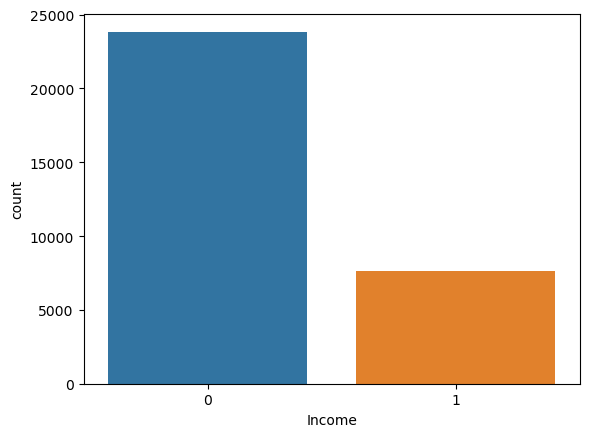

In [140]:
ax=sns.countplot(x='Income', data=df)
print(df['Income'].value_counts())

There is imbalanced data in 'Income' column and need to balance the diffrence by applying SMOTE technique

In [141]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler

In [142]:
Counter(df['Income'])

Counter({0: 23836, 1: 7606})

In [143]:
#Seperating these into two different objects
x=df.drop('Income', axis=1)
y=df.Income

In [144]:
scaler=StandardScaler()

In [145]:
x_scaled=scaler.fit_transform(x)

In [146]:
ove_smp=SMOTE(random_state=55,k_neighbors=3, sampling_strategy=0.80)

In [147]:
x1, y1=ove_smp.fit_resample(x_scaled,y)

In [148]:
print('The number of classes before fit {}'.format(Counter(y)))
print('The number of classes after fit {}'.format(Counter(y1)))

The number of classes before fit Counter({0: 23836, 1: 7606})
The number of classes after fit Counter({0: 23836, 1: 19068})


In [151]:
#Now I am builidng the models and find the best model.
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [152]:
etc=ExtraTreesClassifier()
rfc=RandomForestClassifier()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
lr=LogisticRegression()
svc=SVC()
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()
bc=BaggingClassifier()

In [153]:
mdl=[rfc,etc,lr,svc,knn,dtc,gbc,abc,bc]

In [154]:
for i in range(1, 200):
    x_train, x_test, y_train, y_test=train_test_split(x1, y1, test_size=0.30, random_state=i)
    for i in mdl:
        i.fit(x_train, y_train)
        y_pred=i.predict(x_train)
        tacc=accuracy_score(y_train, y_pred)
        print('Accuracy Score of Train Data:',tacc*100)
        pred=i.predict(x_test)
        acc=accuracy_score(y_test, pred)
        print('Accuracy Score of Test Data:',acc*100)
        print('Model Name: ',i)
        print('\n')
    break

Accuracy Score of Train Data: 99.99334043686734
Accuracy Score of Test Data: 87.34462399005594
Model Name:  RandomForestClassifier()


Accuracy Score of Train Data: 99.99667021843366
Accuracy Score of Test Data: 88.15257924176507
Model Name:  ExtraTreesClassifier()


Accuracy Score of Train Data: 71.02091102823654
Accuracy Score of Test Data: 70.85922933499069
Model Name:  LogisticRegression()


Accuracy Score of Train Data: 79.38199254128929
Accuracy Score of Test Data: 79.28060907395898
Model Name:  SVC()


Accuracy Score of Train Data: 87.57658497602557
Accuracy Score of Test Data: 82.683343691734
Model Name:  KNeighborsClassifier()


Accuracy Score of Train Data: 99.99667021843366
Accuracy Score of Test Data: 82.31044126786824
Model Name:  DecisionTreeClassifier()


Accuracy Score of Train Data: 84.67967501331913
Accuracy Score of Test Data: 84.8586078309509
Model Name:  GradientBoostingClassifier()


Accuracy Score of Train Data: 82.71510388918487
Accuracy Score of Test Data: 83.2

In [155]:
#Every Model has givin the good score. No I will try to check CV score on all the model.
models={'RandomForestClassifier':rfc,'ExtraTreesClassifier':etc,'LogisticRegression':lr,'KNeighborsClassifier':knn,'SVC':svc,'DecisionTreeClassifier':dtc,'GradientBoostingClassifier':gbc,'AdaBoostClassifier':abc,'BaggingClassifier':bc}

In [156]:
for i in mdl:
    score=cross_val_score(i, x_scaled,y)
    print('Model Name is :', i)
    print('Score: ',score)
    print('Score Mean: ',score.mean())
    for name, model in models.items():
        model.fit(x_train, y_train)
        ypred=model.predict(x_test)
    print("diffrent Between Accuracy Score and CV score is :" ,accuracy_score(y_test, ypred)-(score.mean()))
    print("\n")

Model Name is : RandomForestClassifier()
Score:  [0.82461441 0.82366036 0.82379135 0.8336514  0.82442748]
Score Mean:  0.8260289988942283
diffrent Between Accuracy Score and CV score is : 0.029859751882651775


Model Name is : ExtraTreesClassifier()
Score:  [0.81936715 0.81380188 0.81917939 0.82347328 0.81472646]
Score Mean:  0.818109632028458
diffrent Between Accuracy Score and CV score is : 0.03793449475836608


Model Name is : LogisticRegression()
Score:  [0.76148831 0.75878518 0.769243   0.77226463 0.76685751]
Score Mean:  0.7657277266700573
diffrent Between Accuracy Score and CV score is : 0.09435617637531246


Model Name is : SVC()
Score:  [0.80442042 0.80108125 0.80804707 0.8101145  0.80693384]
Score Mean:  0.8061194178858276
diffrent Between Accuracy Score and CV score is : 0.05070158895071675


Model Name is : KNeighborsClassifier()
Score:  [0.80219431 0.80187629 0.80518448 0.80693384 0.80200382]
Score Mean:  0.8036385473727907
diffrent Between Accuracy Score and CV score is :

After seeing CV score of all model I can say AdaBoostClassifier is the best model among all other models. Now I will try to hypertuning this model

In [157]:
from sklearn.model_selection import GridSearchCV

In [169]:
param={'n_estimators': [20,70, 100],
    'learning_rate' : [0.01, 0.1, 0.2, 0.3],
    'n_estimators' : [10, 50, 100]}

In [171]:
gcv = GridSearchCV(abc, param, n_jobs=-1)
gcv.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.3],
                         'n_estimators': [10, 50, 100]})

In [173]:
gcv.best_params_

{'learning_rate': 0.3, 'n_estimators': 100}

In [175]:
final_model=AdaBoostClassifier(learning_rate = 0.3, n_estimators=100)

In [176]:
final_model.fit(x_train, y_train)
pred=final_model.predict(x_test)
accuracy_score(y_test, pred)*100

82.37259167184587

After tunning the parameters I got 82% accuracy score in AdaBoost Classifier model

In [177]:
import joblib
joblib.dump(final_model,'Project Description.pkl')

['Project Description.pkl']